# Machine Learning - Exercise 5
# Linear Classification

Testing linear discriminant models: Least Square, Simple Perceptron, Fisher Discriminant

##Import

Import libraries that contains the implementations of the functions used in the rest of the program.



In [ ]:
import random
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron


print("Libraries imported.")

Libraries imported.


# Data set


Data-generation function

In [ ]:
# Param: n=size of data set, outliers=True/False
def generateData(n, outliers=False):
    X = np.ndarray((n,2))
    t = np.ndarray((n,1))
    n1 = int(n*0.5)

    # define random centers of distributions far away

    for i in range(0,n1):
        X[i,:] = np.random.normal((2.0,8.5),0.5,size=(1,2))
        t[i] = -1
    for i in range(n1,n):
        X[i,:] = np.random.normal((4.0,5.0),0.3,size=(1,2))
        t[i] = 1

    if (outliers):
        no=int(n*0.9)
        for i in range (no,n):
            X[i,:] = np.random.normal((9.0,3.0),0.2,size=(1,2))
            t[i] = 1

    return [X,t]

Generate n data points with/without outliers

In [ ]:
n = 100
outliers = True
np.random.seed(123)

X, t = generateData(n, outliers=outliers)

# print specs
print("Input shape: %s" %str(X.shape))
print("Output shape: %s" %str(t.shape))
print("Number of attributes/features: %d" %(X.shape[1]))
print("Number of classes: %d" %(len(np.unique(t))))
print("Number of samples: %d" %(X.shape[0]))

# show an example
id = random.randrange(0,X.shape[0])

print("Example:")
print("x%d = %r" %(id,X[id]))
print("y%d = %r" %(id,t[id]))

Input shape: (100, 2)
Output shape: (100, 1)
Number of attributes/features: 2
Number of classes: 2
Number of samples: 100
Example:
x53 = array([4.05386485, 4.44140729])
y53 = array([1.])


# Plot functions

In [ ]:
# Plot data
def plotData(X,t,XNr=None,XNg=None,label='Data'):
    Xr = np.ndarray((0,2))
    Xg = np.ndarray((0,2))
    for i in range(0,len(X)):
        if (t[i][0]==1):
            Xr = np.vstack([Xr, [X[i,0],X[i,1]]])
        else:
            Xg = np.vstack([Xg, [X[i,0],X[i,1]]])

    if (not XNr is None):
        plt.plot(XNr[:,0],XNr[:,1],'.', color='#FFAAAA')
    if (not XNg is None):
        plt.plot(XNg[:,0],XNg[:,1],'.', color='#AAFFAA')

    plt.plot(Xr[:,0],Xr[:,1],'ro')
    plt.plot(Xg[:,0],Xg[:,1],'go')
    plt.axis([0,10,0,10])
    plt.title(label)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

# Plot results of a solution
def plotResult(X, t, clf, label):
    XNr = np.ndarray((0,2))
    XNg = np.ndarray((0,2))

    for u in np.arange(0,10,0.1):
        for v in np.arange(0,10,0.1):
            xn = np.array([[u, v]])
            yn = clf.predict(xn)
            if (yn<0):
                XNg = np.vstack([XNg, [u,v]])
            else:
                XNr = np.vstack([XNr, [u,v]])

    plotData(X,t,XNr,XNg,label)

# Draw the dataset

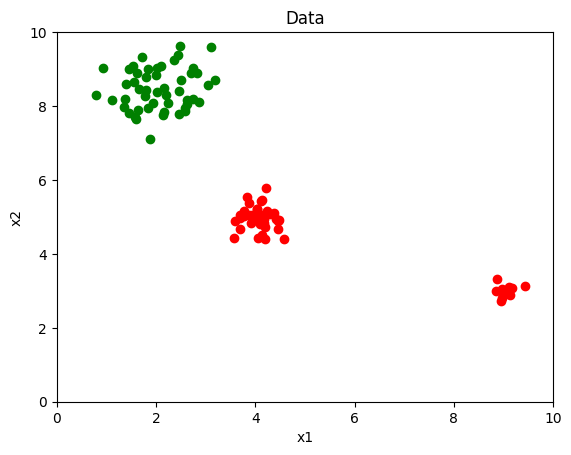

In [ ]:
plotData(X,t)

# Model

## Training models

* Least Square
* Simple Perceptron
* Fisher Discriminant




In [ ]:
class LeastSquare:

    def __init__(self):
        self.w = [0, 0, 0]

    def fit(self,X,t):
        n = len(X) # nr. of examples
        t2 = np.c_[t, 1-t] # t2 is T: 1-of-K encoding
        phi = np.c_[np.ones(n), X] # design matrix
        self.w = np.matmul(np.linalg.pinv(phi),t2) # Least square solution
        print("Least square solution: %s" %(str(self.w.transpose())))

    def predict(self,x):
        xn = np.array((1, x[0][0], x[0][1]))
        yn = np.matmul(self.w.transpose(),xn)
        if yn[0]>yn[1]:
            return 1
        else:
            return -1

In [ ]:
class SimplePerceptron:

    def __init__(self, eta=0.01, niter=100):
        self.eta = eta
        self.niter = niter
        self.w = np.zeros(3)

    def fit(self,X,t):
        print('Perceptron model - eta: %f, niter: %d' %(self.eta, self.niter))
        n = len(X)
        # initial solution
        self.w = np.random.random()*np.ones(3)
        # niter iterations
        for i in range (0,self.niter):
            # select an instance
            k = int(np.random.random()*n)
            xk = np.array([1,X[k][0],X[k][1]])
            if (t[k]==1):
                tk = 1
            else:
                tk = -1
            # output
            o = np.sign(np.dot(self.w,xk))  # thresholded
            # update weigths
            self.w = self.w + self.eta * (tk-o) * xk
        print("Perceptron solution: %s" %str(self.w.transpose()))

    def predict(self,x):
        xn = np.array((1, x[0][0], x[0][1]))
        yn = np.matmul(self.w.transpose(),xn)
        return np.sign(yn)

In [ ]:
class FisherDiscriminant:

    def __init__(self):
        self.w = [0, 0, 0]
        self.label = "Fisher Discriminant"

    def fit(self,X,t):
        n = len(X)  # num of examples
        # group the two subsets
        # C1 = positive samples, C2 = negative samples
        C1 = np.ndarray((0,2))
        C2 = np.ndarray((0,2))
        for i in range(0,len(X)):
            if (t[i][0] == 1):
                C1 = np.vstack([C1, [X[i,0],X[i,1]]])
            else:
                C2 = np.vstack([C2, [X[i,0],X[i,1]]])

        # compute means m1, m2
        m1 = np.mean(C1, axis=0)
        m2 = np.mean(C2, axis=0)

        # compute covariances S1, S2
        S1 = np.zeros((2,2))
        d = np.array(())
        for c in C1:
            d = np.subtract(c,m1).reshape(2,1)
            dt = d.transpose()
            S1 = S1 + np.matmul(d,dt)

        S1 = S1/len(C1);

        S2 = np.zeros((2,2))
        for c in C2:
            d = np.subtract(c,m2).reshape(2,1)
            dt = d.transpose()
            S2 = S2 + np.matmul(d,dt)
        S2 = S2/len(C2);

        # compute Sw matrix
        Sw = S1+S2

        # compute solution w
        wt = np.matmul(np.linalg.inv(Sw),(m1-m2))

        # global mean
        mu = m1 * 0.5 + m2 * 0.5

        # compute constant term
        w0 = np.dot(wt,mu)

        # format the final solution
        self.w = np.array([-w0, wt[0], wt[1]])
        print("Fisher discriminant solution: %s" %str(self.w.transpose()))


    def predict(self,x):
        xn = np.array((1, x[0][0], x[0][1]))
        yn = np.matmul(self.w.transpose(),xn)
        if yn>0:
            return 1
        else:
            return -1

## Choose model to evaluate:

* Least Square
* Simple Perceptron
* Perceptron
* Fisher Discriminant
* SVM  ([info](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC))



In [ ]:
classifier_name = 'F'

ClassifierMap = {
    'L': [LeastSquare, 'Least Square'],
    'F': [FisherDiscriminant, 'Fisher Discriminant'],
    'p': [SimplePerceptron, 'Simple Perceptron'],
    'P': [Perceptron, 'Perceptron'],
    'S': [svm.LinearSVC, 'SVM']
    }

classifier = ClassifierMap[classifier_name][0]()

Set further parameters if using Simple Perceptron

In [ ]:
eta = 0.001
niter = 1000

if (classifier_name == 'p'):  # SimplePerceptron
    classifier.eta = eta
    classifier.niter = niter

Fit classifier

In [ ]:
# train the classifier
classifier.fit(X,t)

Fisher discriminant solution: [43.98049087 -1.40313899 -5.97613077]


# Visualize results

Define visualization functions

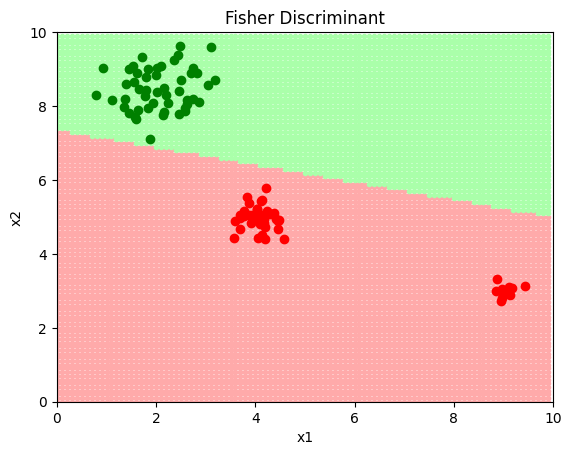

In [ ]:
# show results
plotResult(X,t,classifier,ClassifierMap[classifier_name][1])

# Home Exercises

Test robustness to outliers and to noise.
Generate a test set from the same distributions used to generate the training set.


**Question 1**

Compare the performance of all the models in presence of outliers. Which methods are robust to outliers?

**Question 2**

Compare the performance of all the models in presence of noisy labels. Generate a data set with noisy data (assign random labels to a subset of the dataset).
Plot performace (e.g., accuracy) over percentage of random samples, considering percentage values 0.0, 0.25, 0.5, 0.75, 1.
